<a href="https://colab.research.google.com/github/rharvey242/Linear_Algebra_Coding_projects/blob/main/Copy_of_Gram_Schmidt_Process_with_Periodic_Function_Spaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Related Youtube Video on a talking piano by Mark Rober - watch before completing the activity:  https://www.youtube.com/watch?v=uBEL3YVzMwk



# Gram-Schmidt Process with Function Spaces

1. Project 1: Polynomial spaces
  1. Choose a "random" basis for polynomials of degree 4 or less on the interval $$ -2 \le t \le 2 $$
  2. Create the inner product (dot product) and norm (magnitude) functions
  3. Go through the Gram-Schmidt process to turn the random basis into a nice orthonormal basis
  4. Write some different functions in the orthonormal basis.


2. Project 2: Homework for this project:
  1. Choose a "random" basis for periodic functions on the interval $$ -\pi \le t \le \pi $$
  2. Create the inner product (dot product) and norm (magnitude) functions
  3. Do the Gram-Schmidt process to turn the random basis into a nice orthonormal basis
  4. Write some different functiosn in the orthonormal basis.

In [3]:
#  Libraries that we'll need:
import numpy as np
import sympy as sym
from sympy.plotting import plot
import matplotlib.pyplot as plt

# We'll specify that x and t are variables:
x, t, k, j = sym.symbols('x, t, k, j')

# Project 2: Create an Orthonormal Basis for Periodic Function Spaces

## Part 1. Choose a "random" basis for periodic functions on the interval 
$$ -\pi \le x \le \pi $$

We'll use a naming convention c# and s#, where # is the number of periods that are repeating in the function.  We'll include sine and cosine functions in pairs.

$$  c0 = cos(0x) = 1 \hspace{1cm}  \hspace{3cm}  $$
$$  c1 = cos(x)  \hspace{1cm} s1 = sin(x) $$
$$  c2 = cos(2x)  \hspace{1cm} s2 = sin(2x) $$
$$     \vdots  \hspace{4cm} \vdots $$
$$  c4 = cos(4x)  \hspace{1cm} s4 = sin(4x) $$

[ We won't include $s0 = sin(0x)$, since this is just the zero function. 

In [4]:
from sympy.simplify.fu import CTR4
# Our "random" vectors:
c0 = 1
s1 = sym.sin(x)
c1 = sym.cos(x)
c2=sym.cos(2*x)
s2=sym.sin(2*x)
c3=sym.cos(3*x)
s3=sym.sin(3*x)
c4=sym.cos(4*x)
s4=sym.sin(4*x)
###  YOU FILL THESE IN ###



## Part 2. Create and Scale the inner product (dot product) and norm (magnitude) functions

The inner product that works with the *continuous* functions $f$ and $g$ is

$$ < f | g > \approx \int_{\textrm{Left}}^{\textrm{Right}} g(x) f(x) \; dx $$

or

$$ < f | g > = k \int_{\textrm{Left}}^{\textrm{Right}} g(x) f(x) \; dx $$

We'll include a scaling factor $k$ for convenience, so that the inner product of the constant function $f(x) = 1$ with itself will be one. That is, we'd like

$$< 1 | 1 >  = 1$$

Since we're working with periodic functions, and $cos(0x) = 1$, we'd like:

$$ < \, cos(0x) \, |\, cos(0x) \, > = 1 $$


### 3a. Determining the scaling constant for the inner product on this function space

Find the scaling constant so that the inner product on the constant function $f(x) = 1$ with itself is 1 on the interval 

$$ \pi \le x \le \pi$$

In [5]:
### We need to fix this inner product:

#  Note:  pi is written as  sym.pi
sym.integrate(1*1, (x,-sym.pi,sym.pi))

2*pi

### 3b. Defining the inner product and norm

Using this factor, we'll define our inner product as a function `ip(f,g)` as 

$$ < \, f \, | \, g \, > = \frac{1}{ ?? } \int_{-\pi}^{\pi} g(x) \, f(x) \; dx $$

The norm, or magnitude, of a vector $f$ will be given by

$$ \left| f \right| = \sqrt{ < \, f \, | \, f \, > }$$

We'll use this to define our norm function `n(f)`.  Because of our adjusted scaling factor, we expect the norm of the constant function $f(x) = 1$, written $f(x) = cos(0\,x)$,  to be:

$$ \left| \cos(0x) \right| = 1$$


In [6]:
# YOU SHOULD FIX THIS:
def ip(a,b):
    return (1/(2*sym.pi)) * sym.integrate(a*b, (x, -sym.pi, sym.pi))

def n(a):
    return sym.sqrt(ip(a,a))

### 3c. Test the scaling constant on the inner product and norm

We'll check that everything works:  

  * Is $< 1 | 1 > = 1$

  * Is $\left| 1 \right| = 1$?

In [8]:
# check that ip(1,1) = 1 and n(1) = 1:
print("Testing that <1|1> is 1, and |1| = 1: ")
print("ip(1,1) = ", ip(1,1))
print("n(1) = ", n(1))


Testing that <1|1> is 1, and |1| = 1: 
ip(1,1) =  1
n(1) =  1


## Part 4. Perform the Gram-Schmidt process to create an orthonormal basis from the random basis.

We have the *random* basis

$$  c0 = cos(0x) = 1 \hspace{1cm}  \hspace{3cm}  $$
$$  c1 = cos(x)  \hspace{1cm} s1 = sin(x) $$
$$  c2 = cos(2x)  \hspace{1cm} s2 = sin(2x) $$
$$     \vdots  \hspace{4cm} \vdots $$
$$  c4 = cos(4x)  \hspace{1cm} s4 = sin(4x) $$

We'll use code to perform the Gram-Schmidt Orthonormalization Process to generate the nice *orthonormal* basis given by 

$$   uc_0  \hspace{1cm} uc_1 \hspace{1cm} us_1 \hspace{1cm} uc_2 \hspace{1cm} us_2 \hspace{1cm} \cdots \hspace{1cm} uc_4 \hspace{1cm} us_4 $$

This involves four steps:
  1.  Select an unprocessed vector from the random basis
  2.  Find the vector component $t$ perpendicular to the space spanned our existing nice basis vectors by $uc_0, uc_1, us_1, \cdots, uc_{i-1}, us_{i-1}$.  That is, we'll generalize this expression:
$$ T_i = r_i - <\, r_i \, | \, u_1 \, > \, u_1 - <\, r_i \, | \, u_2 \, > \, u_2 - \cdots - <\, r_i \, | \, u_{i-1} \, > \, u_{i-1}$$
for use with our basis vectors.
  3.  Normalized $t$ and set it to $uc_i$ or $us_i$, if it is non-zero:
  $$ uc_i = \frac{1}{\left| t \right|} t  \hspace{.5cm} \textrm{ or }  \hspace{.5cm} us_i = \frac{1}{\left| t \right| } t \hspace{.5cm} \textrm{ if $T_i \ne \vec{0}$ }$$
  4.  Test that our new vector has norm $1$ and is orthogonal to the previous vectors in the orthonormal basis.  That is, perform this but use our basis vectors $uc0, uc1, us1, \cdots$:
  $$ \textrm{ Check: } \left| u_i \right| = 1 \textrm{ and } < \, u_i \, | \, u_1 \, > = 0, \cdots, < \, u_i \, | \, u_{i-1} \, > = 0$$

### 4a. Find the first vector $uc_0$, and do sanity checks

In [9]:
# Find the orthogonal part to the existing nice basis:
t0 = c0
print("t0 = ", t0)

t0 =  1


In [10]:
# Normalize:
print("|t0| = ", n(t0))
uc0 = (1/n(t0))*t0
print("uc0 = ", uc0)

|t0| =  1
uc0 =  1


In [11]:
# Check that uc0 has size 1 and is orthogonal to prior ui's:
print("Check:  The size of uc0 is ", n(uc0))
#print("Check:  The inner product of u0 and ... is ", ip(uc0,uc0))

Check:  The size of uc0 is  1


### 4b. Process $c1 = cos(x)$ and do sanity checks.

In [12]:
# Find the orthogonal part to the existing u_i's:
tc1 = c1 - ip(c1, uc0)*uc0
print("tc1 = ", tc1)

tc1 =  cos(x)


In [13]:
#Normalize
print("|tc1| = ", n(tc1))
uc1 = (1/n(tc1))*tc1
print("uc1 = ", uc1)
#print("uc1 = ", sym.simplify(uc1))

|tc1| =  sqrt(2)/2
uc1 =  sqrt(2)*cos(x)


In [14]:
# Sanity Check:  Check that uc1 has size 1 and is orthogonal to prior u's:
print("Check:  The size of uc1 is: ", n(uc1))
#print("Check:  The size of uc1 is: ", sym.simplify(n(uc1)))
print("Check:  The inner product of uc1 and uc0 is: ", ip(uc1,uc0))

Check:  The size of uc1 is:  1
Check:  The inner product of uc1 and uc0 is:  0


### 4c. Process $s1 = sin(x)$ and do sanity checks

In [17]:
#  Now, do the same steps above for sin(1x):
# Find the orthogonal part to the existing nice orthogonal basis:
ts1 = s1 - ip(s1, uc0)*uc0 - ip(s1, uc1)*uc1
print("ts1 = ", ts1)
# Normalize:
print("|ts1| = ", n(ts1))
# Form the new orthogonal vector:
us1 = (1/n(ts1))*ts1
print("us1 = ", us1)

ts1 =  sin(x)
|ts1| =  sqrt(2)/2
us1 =  sqrt(2)*sin(x)


In [18]:

# Sanity Check:  Check that us1 has size 1 and is orthogonal to prior u's:
print("Check:  The size of us1 is: ", n(us1))
print("Check:  The inner product of us1 and uc0 is: ", ip(us1,uc0))
print("Check:  The inner product of us1 and uc1 is: ", ip(us1,uc1))

Check:  The size of us1 is:  1
Check:  The inner product of us1 and uc0 is:  0
Check:  The inner product of us1 and uc1 is:  0


### 4d. Process $c2, s2, c3, s3, c4, $ and $s4$ in order to find $uc2, us2, uc3, us3, uc4, $ and $us4$:

In [19]:
tc2= c2 - ip(c2, uc0)*uc0-ip(c2,uc1)*uc1
print("tc2 = ", tc2)
print("|tc2| = ", n(tc2))
uc2 = (1/n(tc2))*tc2
print("uc2 = ", uc2)
#print("uc2 = ", sym.simplify(uc2))
print("Check:  The size of uc2 is: ", n(uc2))
#print("Check:  The size of uc1 is: ", sym.simplify(n(uc1)))
print("Check:  The inner product of uc2 and uc0 is: ", ip(uc2,uc0))
print("Check:  The inner product of uc2 and uc1 is: ", ip(uc2,uc1))

tc2 =  cos(2*x)
|tc2| =  sqrt(2)/2
uc2 =  sqrt(2)*cos(2*x)
Check:  The size of uc2 is:  1
Check:  The inner product of uc2 and uc0 is:  0
Check:  The inner product of uc2 and uc1 is:  0


#### Find uc_2, and do sanity checks

In [20]:
ts2= s2-ip(s2,us1)*us1
print("ts2 = ", ts2)
print("|ts2| = ", n(ts2))
us2 = (1/n(ts2))*ts2
print("us2 = ", us2)
#print("uc2 = ", sym.simplify(uc2))
print("Check:  The size of us2 is: ", n(us2))
#print("Check:  The size of uc1 is: ", sym.simplify(n(uc1)))
print("Check:  The inner product of us2 and us1 is: ", ip(us2,us1))

ts2 =  sin(2*x)
|ts2| =  sqrt(2)/2
us2 =  sqrt(2)*sin(2*x)
Check:  The size of us2 is:  1
Check:  The inner product of us2 and us1 is:  0


#### Find us_2, and do sanity checks

#### FInd $uc_3$ and do sanity checks

In [23]:
tc3= c3 - ip(c3, uc0)*uc0-ip(c3,uc1)*uc1-ip(c3,uc2)*uc2
print("tc3 = ", tc3)
print("|tc3| = ", n(tc3))
uc3 = (1/n(tc3))*tc3
print("uc3 = ", uc3)
#print("Check:  The size of uc3 is: ", sym.simplify(n(uc3)))
print("Check:  The inner product of uc3 and uc0 is: ", ip(uc3,uc0))
print("Check:  The inner product of uc3 and uc1 is: ", ip(uc3,uc1))
print("Check:  The inner product of uc3 and uc2 is: ", ip(uc3,uc2))

tc3 =  cos(3*x)
|tc3| =  sqrt(2)/2
uc3 =  sqrt(2)*cos(3*x)
Check:  The inner product of uc3 and uc0 is:  0
Check:  The inner product of uc3 and uc1 is:  0
Check:  The inner product of uc3 and uc2 is:  0


#### Find $us_3$ and do sanity checks

In [24]:
ts3= s3-ip(s3,us1)*us1-ip(s3,us2)*us2
print("ts3 = ", ts3)
print("|ts3| = ", n(ts3))
us3 = (1/n(ts3))*ts3
print("us3 = ", us3)
#print("uc3 = ", sym.simplify(uc3))
print("Check:  The size of us3 is: ", n(us3))
#print("Check:  The size of uc3 is: ", sym.simplify(n(uc3)))
print("Check:  The inner product of us3 and us1 is: ", ip(us3,us1))
print("Check:  The inner product of us3 and us2 is: ", ip(us3,us2))

ts3 =  sin(3*x)
|ts3| =  sqrt(2)/2
us3 =  sqrt(2)*sin(3*x)
Check:  The size of us3 is:  1
Check:  The inner product of us3 and us1 is:  0
Check:  The inner product of us3 and us2 is:  0


#### Find $uc_4$ and do sanity checks

In [25]:
tc4= c4 - ip(c4, uc0)*uc0-ip(c4,uc1)*uc1-ip(c4,uc2)*uc2-ip(c4,uc3)*uc3
print("tc4 = ", tc4)
print("|tc4| = ", n(tc4))
uc4 = (1/n(tc4))*tc4
print("uc4 = ", uc4)
#print("uc3 = ", sym.simplify(uc3))
print("Check:  The size of uc4 is: ", n(uc4))
#print("Check:  The size of uc3 is: ", sym.simplify(n(uc3)))
print("Check:  The inner product of uc4 and uc0 is: ", ip(uc4,uc0))
print("Check:  The inner product of uc4 and uc1 is: ", ip(uc4,uc1))
print("Check:  The inner product of uc4 and uc2 is: ", ip(uc4,uc2))
print("Check:  The inner product of uc4 and uc3 is: ", ip(uc4,uc3))

tc4 =  cos(4*x)
|tc4| =  sqrt(2)/2
uc4 =  sqrt(2)*cos(4*x)
Check:  The size of uc4 is:  1
Check:  The inner product of uc4 and uc0 is:  0
Check:  The inner product of uc4 and uc1 is:  0
Check:  The inner product of uc4 and uc2 is:  0
Check:  The inner product of uc4 and uc3 is:  0


#### FInd $us_4$ and do sanity checks

In [36]:
ts4= s4-ip(s4,us1)*us1-ip(s4,us2)*us2-ip(s4,us3)*us3
print("ts4 = ", ts4)
print("|ts4| = ", n(ts4))
uc4 = (1/n(ts4))*ts4
print("us4 = ", us4)
print("Check:  The size of us4 is: ", n(us4))
print("Check:  The inner product of us4 and us1 is: ", ip(us4,us1))
print("Check:  The inner product of us4 and us2 is: ", ip(us4,us2))
print("Check:  The inner product of us4 and us3 is: ", ip(us4,us3))

ts4 =  nan
|ts4| =  nan
us4 =  nan
Check:  The size of us4 is:  nan
Check:  The inner product of us4 and us1 is:  nan
Check:  The inner product of us4 and us2 is:  nan
Check:  The inner product of us4 and us3 is:  nan


### 4f. The orthonormal basis:

In [37]:
#The new basis:
print("The Orthonormal Basis: ")
print("uc0 = ", uc0)
print("uc1 = ", uc1)
print("us1 = ", us1)
print("uc2 = ", uc2)
print("us1 = ", us2)
print("uc3 = ", uc3)
print("us1 = ", us3)
print("uc4 = ", uc4)
print("us1 = ", us4)


The Orthonormal Basis: 
uc0 =  1
uc1 =  sqrt(2)*cos(x)
us1 =  sqrt(2)*sin(x)
uc2 =  sqrt(2)*cos(2*x)
us1 =  sqrt(2)*sin(2*x)
uc3 =  sqrt(2)*cos(3*x)
us1 =  nan
uc4 =  nan
us1 =  nan


## Part 5. Express various functions in the orthonormal basis.

### 5a. Approximate $x$ in this orthonormal basis

We approximate the functions using four iterations:

  1.  Just using $uc0$
  2.  Using $uc0, uc1,$ and $us1$
  3.  Also including $uc2$ and $us2$
  4.  Also including $uc3$ and $us3$
  5.  Finally using all the basis elements by also including $uc4$ and $us4$.

0th approximation to  x  is:  0


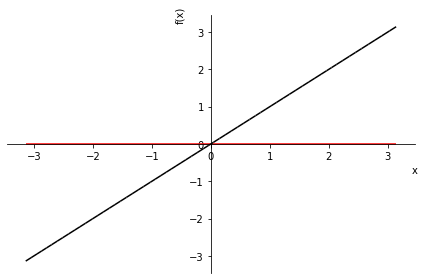

1st approximation to  x  is:  2*sin(x)


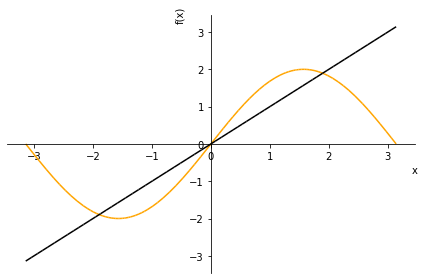

2nd approximation to  x  is:  2*sin(x) - sin(2*x)


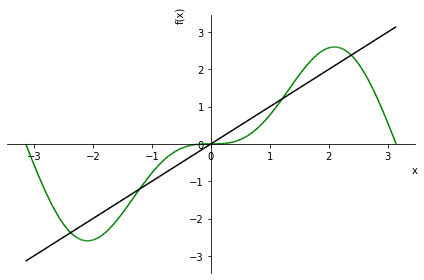

3rd approximation to  x  is:  nan


NameError: ignored

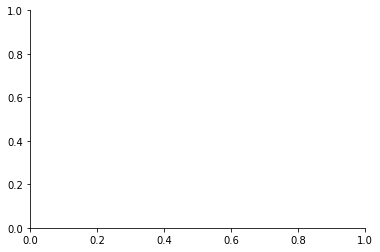

In [38]:
pp = x
plot_original = plot(pp, (x,-sym.pi,sym.pi), line_color='black', show=False)

pp0 = ip(pp,uc0)*uc0 
plot0 = plot(pp0, (x,-sym.pi,sym.pi), line_color='red', show=False)
print("0th approximation to ", pp , " is: ", pp0)
plot0.extend(plot_original)
plot0.show()

pp1 = ip(pp,uc0)*uc0 + ip(pp,uc1)*uc1 + ip(pp,us1)*us1 
plot1 = plot(pp1, (x,-sym.pi,sym.pi), line_color='orange', show=False)
print("1st approximation to ", pp , " is: ", pp1)
plot1.extend(plot_original)
plot1.show()

pp2 = ip(pp,uc0)*uc0+ ip(pp,uc1)*uc1 + ip(pp,us1)*us1 + ip(pp,uc2)*uc2  + ip(pp,us2)*us2
plot2 = plot(pp2, (x,-sym.pi,sym.pi), line_color='green', show=False)
print("2nd approximation to ", pp , " is: ", pp2)
plot2.extend(plot_original)
plot2.show()

pp3 = ip(pp,uc0)*uc0+ ip(pp,uc1)*uc1 + ip(pp,us1)*us1 + ip(pp,uc2)*uc2  + ip(pp,us2)*us2 + ip(pp,uc3)*uc3  + ip(pp,us3)*us3
plot3 = plot(pp3, (x,-sym.pi,sym.pi), line_color='blue', show=False)
print("3rd approximation to ", pp , " is: ", pp3)
plot3.extend(plot_original)
plot3.show()

pp4 = ip(pp,uc0)*uc0+ ip(pp,uc1)*uc1 + ip(pp,us1)*us1 + ip(pp,uc2)*uc2  + ip(pp,us2)*us2 + ip(pp,uc3)*uc3  + ip(pp,us3)*us3 + ip(pp,uc4)*uc4 + ip(pp,us4)*us4
plot4 = plot(pp4, (x,-sym.pi,sym.pi), line_color='purple', show=False)
print("4th approximation to ", pp , " is: ", pp4)
plot4.extend(plot_original)
plot4.show()


# plot all of them:
plot_original.extend(plot0)
plot_original.extend(plot1)
plot_original.extend(plot2)
plot_original.extend(plot3)
plot_original.extend(plot4)
plot_original.show()

### 5b. Approximate $e^x$ in this orthonormal basis

0th aqqroximation to  exp(x)  is:  (-exp(-pi) + exp(pi))/(2*pi)


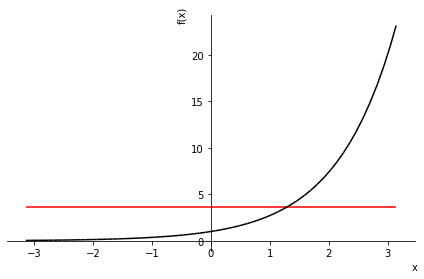

1st aqqroximation to  exp(x)  is:  sqrt(2)*(-sqrt(2)*exp(-pi)/2 + sqrt(2)*exp(pi)/2)*sin(x)/(2*pi) + sqrt(2)*(-sqrt(2)*exp(pi)/2 + sqrt(2)*exp(-pi)/2)*cos(x)/(2*pi) + (-exp(-pi) + exp(pi))/(2*pi)


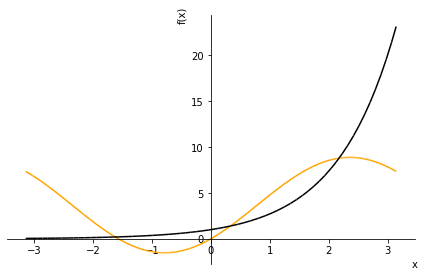

2nd aqqroximation to  exp(x)  is:  sqrt(2)*(-sqrt(2)*exp(-pi)/2 + sqrt(2)*exp(pi)/2)*sin(x)/(2*pi) + sqrt(2)*(-2*sqrt(2)*exp(pi)/5 + 2*sqrt(2)*exp(-pi)/5)*sin(2*x)/(2*pi) + sqrt(2)*(-sqrt(2)*exp(pi)/2 + sqrt(2)*exp(-pi)/2)*cos(x)/(2*pi) + sqrt(2)*(-sqrt(2)*exp(-pi)/5 + sqrt(2)*exp(pi)/5)*cos(2*x)/(2*pi) + (-exp(-pi) + exp(pi))/(2*pi)


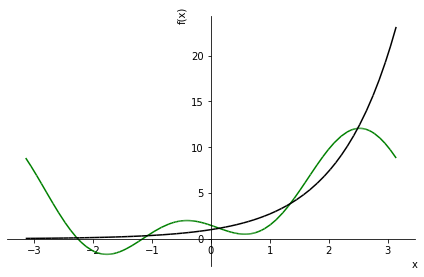

3rd aqqroximation to  exp(x)  is:  nan


NameError: ignored

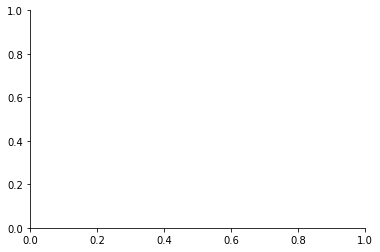

In [39]:
qq = sym.exp(x)
plot_original = plot(qq, (x,-sym.pi,sym.pi), line_color='black', show=False)

qq0 = ip(qq,uc0)*uc0 
plot0 = plot(qq0, (x,-sym.pi,sym.pi), line_color='red', show=False)
print("0th aqqroximation to ", qq , " is: ", qq0)
plot0.extend(plot_original)
plot0.show()

qq1 = ip(qq,uc0)*uc0 + ip(qq,uc1)*uc1 + ip(qq,us1)*us1 
plot1 = plot(qq1, (x,-sym.pi,sym.pi), line_color='orange', show=False)
print("1st aqqroximation to ", qq , " is: ", qq1)
plot1.extend(plot_original)
plot1.show()

qq2 = ip(qq,uc0)*uc0+ ip(qq,uc1)*uc1 + ip(qq,us1)*us1 + ip(qq,uc2)*uc2  + ip(qq,us2)*us2
plot2 = plot(qq2, (x,-sym.pi,sym.pi), line_color='green', show=False)
print("2nd aqqroximation to ", qq , " is: ", qq2)
plot2.extend(plot_original)
plot2.show()

qq3 = ip(qq,uc0)*uc0+ ip(qq,uc1)*uc1 + ip(qq,us1)*us1 + ip(qq,uc2)*uc2  + ip(qq,us2)*us2 + ip(qq,uc3)*uc3  + ip(qq,us3)*us3
plot3 = plot(qq3, (x,-sym.pi,sym.pi), line_color='blue', show=False)
print("3rd aqqroximation to ", qq , " is: ", qq3)
plot3.extend(plot_original)
plot3.show()

qq4 = ip(qq,uc0)*uc0+ ip(qq,uc1)*uc1 + ip(qq,us1)*us1 + ip(qq,uc2)*uc2  + ip(qq,us2)*us2 + ip(qq,uc3)*uc3  + ip(qq,us3)*us3 + ip(qq,uc4)*uc4 + ip(qq,us4)*us4
plot4 = plot(qq4, (x,-sym.pi,sym.pi), line_color='purple', show=False)
print("4th aqqroximation to ", qq , " is: ", qq4)
plot4.extend(plot_original)
plot4.show()


# plot all of them:
plot_original.extend(plot0)
plot_original.extend(plot1)
plot_original.extend(plot2)
plot_original.extend(plot3)
plot_original.extend(plot4)
plot_original.show()

### 5c. Approximate the polynomial $1 - x + x^2 - x^3 + x^4 $ in this orthonormal basis

0th assroximation to  x**4 - x**3 + x**2 - x + 1  is:  (2*pi + 2*pi**3/3 + 2*pi**5/5)/(2*pi)


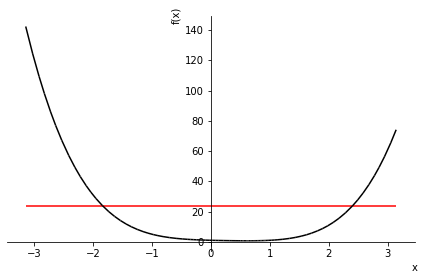

1st assroximation to  x**4 - x**3 + x**2 - x + 1  is:  sqrt(2)*(-sqrt(2)*(-11*pi**2 - 5*pi + 23 + pi**3 + pi**4) + sqrt(2)*(-11*pi**2 - pi**3 + 5*pi + 23 + pi**4))*sin(x)/(2*pi) + sqrt(2)*(-sqrt(2)*(-22*pi - 5 + 3*pi**2 + 4*pi**3) + sqrt(2)*(-4*pi**3 - 5 + 3*pi**2 + 22*pi))*cos(x)/(2*pi) + (2*pi + 2*pi**3/3 + 2*pi**5/5)/(2*pi)


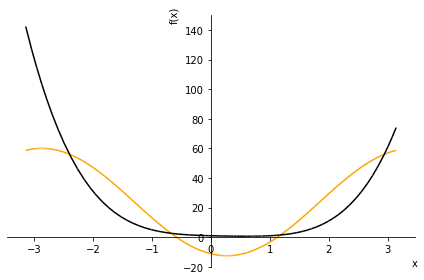

2nd assroximation to  x**4 - x**3 + x**2 - x + 1  is:  sqrt(2)*(-sqrt(2)*(-11*pi**2 - 5*pi + 23 + pi**3 + pi**4) + sqrt(2)*(-11*pi**2 - pi**3 + 5*pi + 23 + pi**4))*sin(x)/(2*pi) + sqrt(2)*(sqrt(2)*(-pi**4/2 - 1 - pi/4 + pi**2 + pi**3/2) - sqrt(2)*(-pi**4/2 - pi**3/2 - 1 + pi/4 + pi**2))*sin(2*x)/(2*pi) + sqrt(2)*(-sqrt(2)*(-22*pi - 5 + 3*pi**2 + 4*pi**3) + sqrt(2)*(-4*pi**3 - 5 + 3*pi**2 + 22*pi))*cos(x)/(2*pi) + sqrt(2)*(sqrt(2)*(-3*pi**2/4 - pi + 1/8 + pi**3) - sqrt(2)*(-pi**3 - 3*pi**2/4 + 1/8 + pi))*cos(2*x)/(2*pi) + (2*pi + 2*pi**3/3 + 2*pi**5/5)/(2*pi)


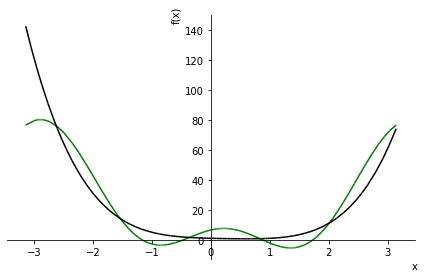

KeyboardInterrupt: ignored

In [40]:
ss = 1-x+x**2-x**3+x**4

plot_original = plot(ss, (x,-sym.pi,sym.pi), line_color='black', show=False)
ss0 = ip(ss,uc0)*uc0 
plot0 = plot(ss0, (x,-sym.pi,sym.pi), line_color='red', show=False)
print("0th assroximation to ", ss , " is: ", ss0)
plot0.extend(plot_original)
plot0.show()

ss1 = ip(ss,uc0)*uc0 + ip(ss,uc1)*uc1 + ip(ss,us1)*us1 
plot1 = plot(ss1, (x,-sym.pi,sym.pi), line_color='orange', show=False)
print("1st assroximation to ", ss , " is: ", ss1)
plot1.extend(plot_original)
plot1.show()

ss2 = ip(ss,uc0)*uc0+ ip(ss,uc1)*uc1 + ip(ss,us1)*us1 + ip(ss,uc2)*uc2  + ip(ss,us2)*us2
plot2 = plot(ss2, (x,-sym.pi,sym.pi), line_color='green', show=False)
print("2nd assroximation to ", ss , " is: ", ss2)
plot2.extend(plot_original)
plot2.show()

ss3 = ip(ss,uc0)*uc0+ ip(ss,uc1)*uc1 + ip(ss,us1)*us1 + ip(ss,uc2)*uc2  + ip(ss,us2)*us2 + ip(ss,uc3)*uc3  + ip(ss,us3)*us3
plot3 = plot(ss3, (x,-sym.pi,sym.pi), line_color='blue', show=False)
print("3rd assroximation to ", ss , " is: ", ss3)
plot3.extend(plot_original)
plot3.show()

ss4 = ip(ss,uc0)*uc0+ ip(ss,uc1)*uc1 + ip(ss,us1)*us1 + ip(ss,uc2)*uc2  + ip(ss,us2)*us2 + ip(ss,uc3)*uc3  + ip(ss,us3)*us3 + ip(ss,uc4)*uc4 + ip(ss,us4)*us4
plot4 = plot(ss4, (x,-sym.pi,sym.pi), line_color='purple', show=False)
print("4th assroximation to ", ss , " is: ", ss4)
plot4.extend(plot_original)
plot4.show()


# plot all of them:
plot_original.extend(plot0)
plot_original.extend(plot1)
plot_original.extend(plot2)
plot_original.extend(plot3)
plot_original.extend(plot4)
plot_original.show()